In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Amazon Sale Report.csv')
df.head(3)

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_13508\3278121444.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [4]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [5]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [6]:
df.drop(columns=['index','promotion-ids','Unnamed: 22'], inplace=True)

In [7]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN


In [8]:
obj_cols = df.select_dtypes(include="object").columns

In [9]:
obj_cols

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'currency', 'ship-city', 'ship-state', 'ship-country',
       'fulfilled-by'],
      dtype='object')

In [10]:
df[obj_cols] = df[obj_cols].fillna('Unknown')

In [11]:
df = df.astype({col:"string" for col in obj_cols})

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128975 non-null  string 
 1   Date                128975 non-null  string 
 2   Status              128975 non-null  string 
 3   Fulfilment          128975 non-null  string 
 4   Sales Channel       128975 non-null  string 
 5   ship-service-level  128975 non-null  string 
 6   Style               128975 non-null  string 
 7   SKU                 128975 non-null  string 
 8   Category            128975 non-null  string 
 9   Size                128975 non-null  string 
 10  ASIN                128975 non-null  string 
 11  Courier Status      128975 non-null  string 
 12  Qty                 128975 non-null  int64  
 13  currency            128975 non-null  string 
 14  Amount              121180 non-null  float64
 15  ship-city           128975 non-nul

In [13]:
df["ship-postal-code"] = df["ship-postal-code"].astype("string")

In [14]:
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")

C:\Users\PYTHON\AppData\Local\Temp\ipykernel_13508\3693147909.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


In [15]:
median = df["Amount"].median() if not df["Amount"].empty else 0

In [16]:
df["Amount"] = df["Amount"].fillna(median)

In [17]:
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1

In [18]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df.loc[(df["Amount"] > upper_bound) | (df["Amount"] < lower_bound), "Amount"] = median

In [19]:
df["B2B"] = df["B2B"].fillna(False)

In [20]:
df.head(10)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,Unknown,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,Unknown
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,Unknown,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,Unknown
5,404-1490984-4578765,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,XL,...,Shipped,1,INR,824.00,GHAZIABAD,UTTAR PRADESH,201102.0,IN,False,Unknown
6,408-5748499-6859555,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,J0095,J0095-SET-L,Set,L,...,Shipped,1,INR,653.00,CHANDIGARH,CHANDIGARH,160036.0,IN,False,Unknown
7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3405,JNE3405-KR-S,kurta,S,...,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032.0,IN,False,Easy Ship
8,407-5443024-5233168,2022-04-30,Cancelled,Amazon,Amazon.in,Expedited,SET200,SET200-KR-NP-A-XXXL,Set,3XL,...,Cancelled,0,Unknown,605.00,HYDERABAD,TELANGANA,500008.0,IN,False,Unknown
9,402-4393761-0311520,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3461,JNE3461-KR-XXL,kurta,XXL,...,Shipped,1,INR,363.00,Chennai,TAMIL NADU,600041.0,IN,False,Unknown


In [21]:
top5_df = df.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(5)

In [22]:
top5_df

Category
Set              37971799.01
kurta            23175346.22
Western Dress    11585006.12
Top               5616163.30
Ethnic Dress       813615.66
Name: Amount, dtype: float64

In [23]:
top5_df = top5_df.reset_index()
top5_df.columns = ['Category', 'Amount']

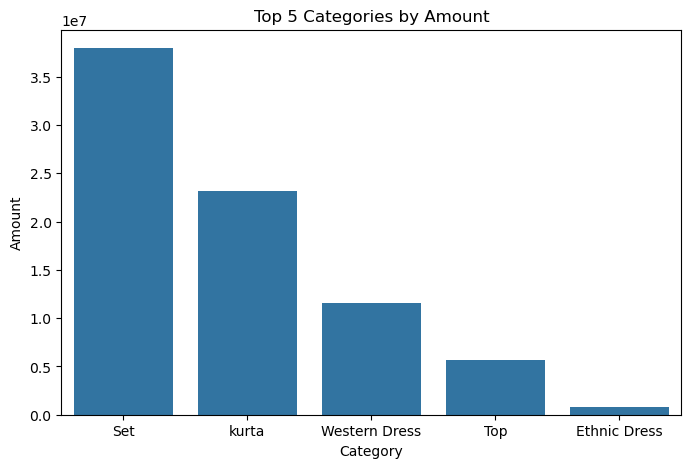

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(x='Category', y='Amount', data=top5_df)
plt.title("Top 5 Categories by Amount")
plt.xlabel('Category')
plt.ylabel('Amount')
plt.show()

In [25]:
top3_df = df.groupby("ship-state")["Amount"].sum().sort_values(ascending=False).head(3)

In [26]:
top3_df

ship-state
MAHARASHTRA    13551183.32
KARNATAKA      10641433.52
TELANGANA       7044296.65
Name: Amount, dtype: float64

In [27]:
top3_df = top3_df.reset_index()
top3_df.columns = ['ship-state', 'Amount']

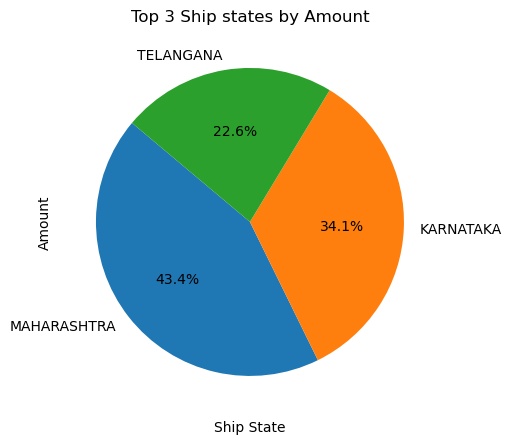

In [28]:
plt.figure(figsize=(5,5))
plt.pie(top3_df['Amount'],labels=top3_df['ship-state'],autopct='%1.1f%%',startangle=140)
plt.title("Top 3 Ship states by Amount")
plt.xlabel("Ship State")
plt.ylabel("Amount")
plt.show()

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Order ID            128975 non-null  string        
 1   Date                128975 non-null  datetime64[ns]
 2   Status              128975 non-null  string        
 3   Fulfilment          128975 non-null  string        
 4   Sales Channel       128975 non-null  string        
 5   ship-service-level  128975 non-null  string        
 6   Style               128975 non-null  string        
 7   SKU                 128975 non-null  string        
 8   Category            128975 non-null  string        
 9   Size                128975 non-null  string        
 10  ASIN                128975 non-null  string        
 11  Courier Status      128975 non-null  string        
 12  Qty                 128975 non-null  int64         
 13  currency            128975 no

In [30]:
df['day'] = df['Date'].dt.day

In [31]:
df['month'] = df['Date'].dt.month

In [32]:
df = pd.get_dummies(df, columns=['day','month'], drop_first=False)

In [33]:
df.head(3)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,day_26,day_27,day_28,day_29,day_30,day_31,month_3,month_4,month_5,month_6
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,False,False,False,False,True,False,False,True,False,False
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,False,False,False,False,True,False,False,True,False,False
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,False,False,False,False,True,False,False,True,False,False


In [34]:
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'B2B', 'fulfilled-by',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7', 'day_8',
       'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14', 'day_15',
       'day_16', 'day_17', 'day_18', 'day_19', 'day_20', 'day_21', 'day_22',
       'day_23', 'day_24', 'day_25', 'day_26', 'day_27', 'day_28', 'day_29',
       'day_30', 'day_31', 'month_3', 'month_4', 'month_5', 'month_6'],
      dtype='object')

In [35]:
df = df.drop(columns=['Order ID', 'Date', 'SKU', 'ASIN', 'ship-postal-code'])

In [36]:
cols_to_encode = ['Status', 'Fulfilment', 'Sales Channel ', 'ship-service-level', 'Style',
                   'Category', 'Size', 'Courier Status', 'currency', 'ship-city', 'ship-state', 
                    'ship-country', 'B2B', 'fulfilled-by'
                 ]

In [37]:
df_encoded = pd.get_dummies(df, columns=cols_to_encode, drop_first=False)

In [38]:
df_encoded.head(5)

,Qty,Amount,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,...,ship-state_orissa,ship-state_punjab,ship-state_rajasthan,ship-state_rajsthan,ship-country_IN,ship-country_Unknown,B2B_False,B2B_True,fulfilled-by_Easy Ship,fulfilled-by_Unknown
0,0,647.62,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
1,1,406.00,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
2,1,329.00,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
3,0,753.33,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,True,False
4,1,574.00,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,True


In [39]:
df.to_csv('cleaned_amazon_sales_data.csv', index=False)

In [40]:
df_encoded.columns

Index(['Qty', 'Amount', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8',
       ...
       'ship-state_orissa', 'ship-state_punjab', 'ship-state_rajasthan',
       'ship-state_rajsthan', 'ship-country_IN', 'ship-country_Unknown',
       'B2B_False', 'B2B_True', 'fulfilled-by_Easy Ship',
       'fulfilled-by_Unknown'],
      dtype='object', length=10491)

In [41]:
df_model = df_encoded.copy()

# Example rule: mark top 25% Amount as leads
threshold = df_model['Amount'].quantile(0.75)
df_model['Lead'] = (df_model['Amount'] >= threshold).astype(int)

# Use df_model going forward


In [42]:
df_model

,Qty,Amount,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,...,ship-state_punjab,ship-state_rajasthan,ship-state_rajsthan,ship-country_IN,ship-country_Unknown,B2B_False,B2B_True,fulfilled-by_Easy Ship,fulfilled-by_Unknown,Lead
0,0,647.62,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,0
1,1,406.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,0
2,1,329.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,True,0
3,0,753.33,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,True,False,0
4,1,574.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,1,517.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,0
128971,1,999.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1
128972,1,690.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,0
128973,1,1199.00,False,False,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,1


In [43]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

X = df_model.drop(columns=['Lead'])   # all predictors
y = df_model['Lead']                  # target

# # Encode string columns
# label_encoders = {}
# for col in X.select_dtypes(include='object').columns:
#     le = LabelEncoder()
#     X[col] = le.fit_transform(X[col].astype(str))
#     label_encoders[col] = le

# # Convert booleans to int
# X = X.apply(lambda c: c.astype(int) if c.dtype=='bool' else c)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 1.0


In [45]:
# Keep only rows marked as leads
potential_leads = df_model[df_model['Lead'] == 1]

print("✅ Potential leads found:", len(potential_leads))


✅ Potential leads found: 32346


In [46]:
potential_leads.to_csv("potential_leads.csv", index=False)
print("✅ Saved only potential leads to potential_leads.csv")


✅ Saved only potential leads to potential_leads.csv
